In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
df=pd.read_csv("screw_bold.csv")
df

,Part No,Type of Product,Overall Length (mm),Thread Length (mm),Head Thickness (mm),Flat (mm),Corner (mm),Label,Predicted_Label,Predicted Label
0,SB0001,Screw,20,17,4.5,3.2,3.8,Select,1,Select
1,SB0002,Screw,38,34,4.1,3.1,3.7,Reject,0,Reject
2,SB0003,Screw,37,35,5.4,4.1,4.8,Select,1,Select
3,SB0004,Bolt,58,53,8.0,4.5,5.6,Select,1,Select
4,SB0005,Bolt,50,45,6.4,5.9,6.8,Select,1,Select
...,...,...,...,...,...,...,...,...,...,...
995,SB0996,Screw,29,26,4.4,3.0,3.5,Select,1,Select
996,SB0997,Screw,39,38,5.4,3.2,4.1,Select,1,Select
997,SB0998,Screw,32,27,5.6,3.3,3.9,Reject,0,Reject
998,SB0999,Screw,28,25,4.9,4.4,5.2,Reject,0,Select


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Part No              1000 non-null   object 
 1   Type of Product      1000 non-null   object 
 2   Overall Length (mm)  1000 non-null   int64  
 3   Thread Length (mm)   1000 non-null   int64  
 4   Head Thickness (mm)  1000 non-null   float64
 5   Flat (mm)            1000 non-null   float64
 6   Corner (mm)          1000 non-null   float64
 7   Label                1000 non-null   object 
 8   Predicted_Label      1000 non-null   int64  
 9   Predicted Label      1000 non-null   object 
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [90]:
df.head()

,Part No,Type of Product,Overall Length (mm),Thread Length (mm),Head Thickness (mm),Flat (mm),Corner (mm),Label,Predicted_Label,Predicted Label
0,SB0001,Screw,20,17,4.5,3.2,3.8,Select,1,Select
1,SB0002,Screw,38,34,4.1,3.1,3.7,Reject,0,Reject
2,SB0003,Screw,37,35,5.4,4.1,4.8,Select,1,Select
3,SB0004,Bolt,58,53,8.0,4.5,5.6,Select,1,Select
4,SB0005,Bolt,50,45,6.4,5.9,6.8,Select,1,Select


In [91]:
df.isnull().sum()

Part No                0
Type of Product        0
Overall Length (mm)    0
Thread Length (mm)     0
Head Thickness (mm)    0
Flat (mm)              0
Corner (mm)            0
Label                  0
Predicted_Label        0
Predicted Label        0
dtype: int64

In [92]:
import numpy as np
from scipy.stats import zscore

df_numeric = df.select_dtypes(include=[np.number])
def detect_outliers_iqr(data):
    outlier_indices = {}
    for column in data.columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)].index
        outlier_indices[column] = list(outliers)
    return outlier_indices

iqr_outliers = detect_outliers_iqr(df_numeric)
print("Columns:\n", df.columns)
print("\nFirst few rows:\n", df.head())
print("\nOutliers detected using IQR:\n", iqr_outliers)

Columns:
 Index(['Part No', 'Type of Product', 'Overall Length (mm)',
       'Thread Length (mm)', 'Head Thickness (mm)', 'Flat (mm)', 'Corner (mm)',
       'Label', 'Predicted_Label', 'Predicted Label'],
      dtype='object')

First few rows:
   Part No Type of Product  Overall Length (mm)  Thread Length (mm)  \
0  SB0001           Screw                   20                  17   
1  SB0002           Screw                   38                  34   
2  SB0003           Screw                   37                  35   
3  SB0004            Bolt                   58                  53   
4  SB0005            Bolt                   50                  45   

   Head Thickness (mm)  Flat (mm)  Corner (mm)   Label  Predicted_Label  \
0                  4.5        3.2          3.8  Select                1   
1                  4.1        3.1          3.7  Reject                0   
2                  5.4        4.1          4.8  Select                1   
3                  8.0        4.5 

In [93]:
df.describe()

,Overall Length (mm),Thread Length (mm),Head Thickness (mm),Flat (mm),Corner (mm),Predicted_Label
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,42.611000,38.635000,6.065500,4.477600,5.349900,0.49000
std,14.813951,14.025851,1.279945,0.860546,0.972711,0.50015
min,20.000000,15.000000,4.000000,3.000000,3.500000,0.00000
25%,30.000000,27.000000,4.900000,3.700000,4.500000,0.00000
50%,40.000000,36.000000,5.900000,4.500000,5.300000,0.00000
75%,56.000000,50.000000,7.100000,5.200000,6.200000,1.00000
max,70.000000,67.000000,8.500000,6.000000,7.200000,1.00000


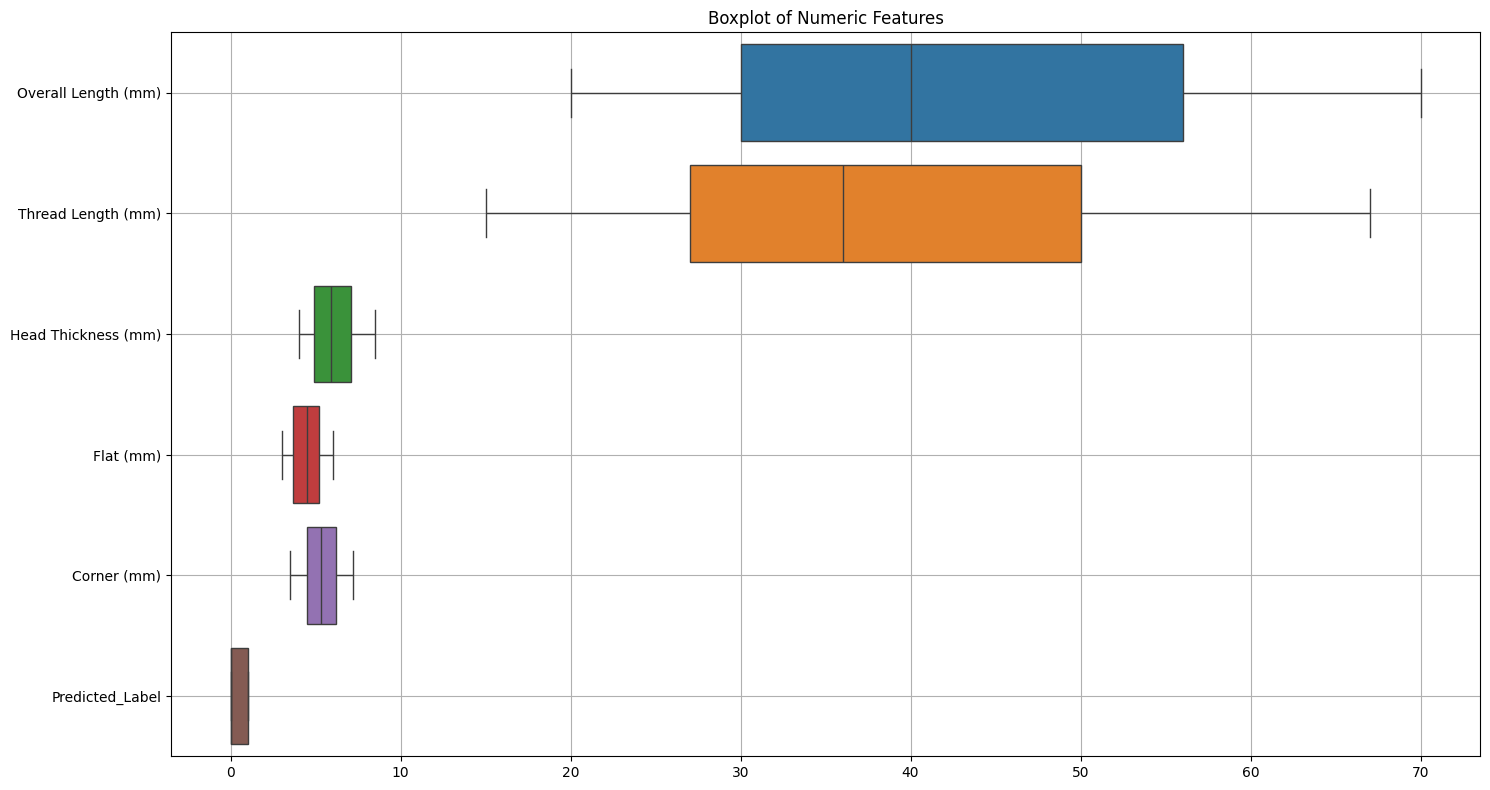

In [94]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_numeric, orient='h')
plt.title("Boxplot of Numeric Features")
plt.tight_layout()
plt.grid(True)
plt.show()

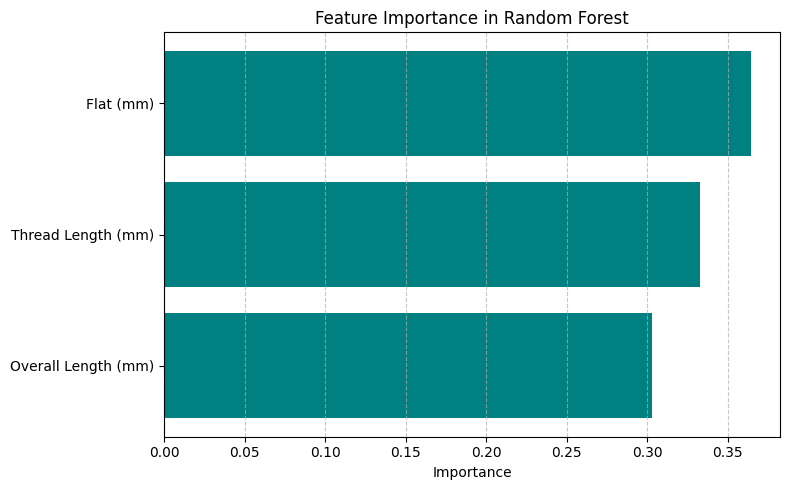

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
X = df[['Overall Length (mm)', 'Thread Length (mm)', 'Flat (mm)']]
y = LabelEncoder().fit_transform(df['Label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
importances = model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances, color='teal')
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Skewness of each feature:
Overall Length (mm)    0.261220
Thread Length (mm)     0.270297
Head Thickness (mm)    0.193274
Flat (mm)              0.045876
Corner (mm)            0.050197
Predicted_Label        0.040008
dtype: float64


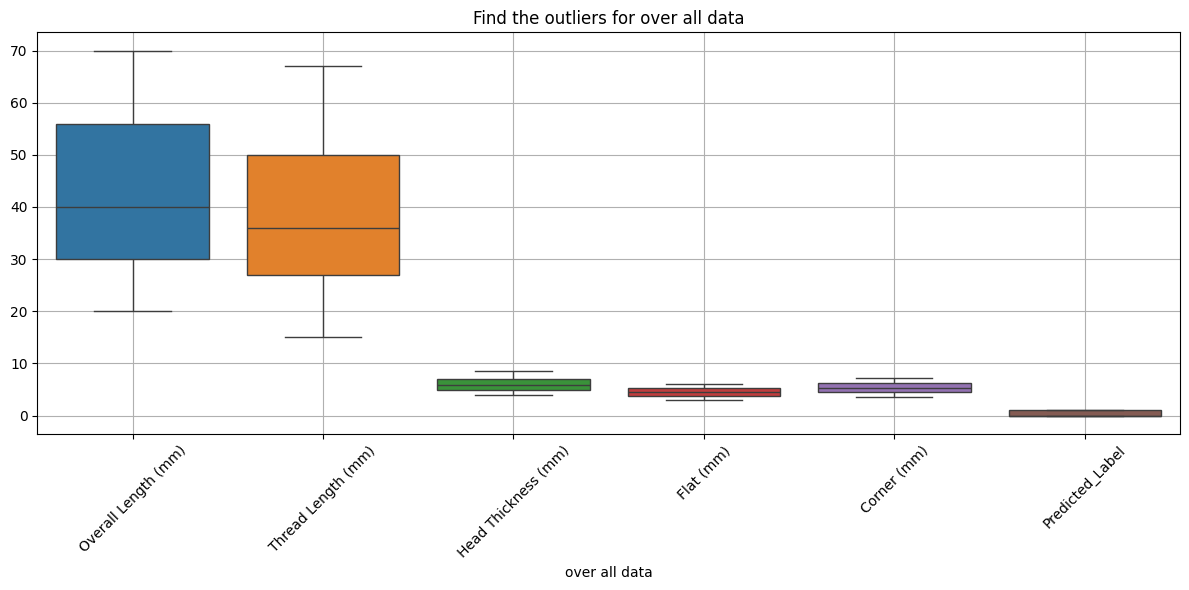

In [96]:
imputed_data = df.select_dtypes(include=['float64', 'int64']).fillna(df.mean(numeric_only=True))
print("Skewness of each feature:")
print(imputed_data.apply(skew))
plt.figure(figsize=(12, 6))
sns.boxplot(data=imputed_data)
plt.xticks(rotation=45)
plt.xlabel("over all data")
plt.title("Find the outliers for over all data")
plt.grid(True)
plt.tight_layout()
plt.show()

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df[['Overall Length (mm)', 'Thread Length (mm)', 'Flat (mm)']]
y = df['Label']
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (Random Forest):", round(accuracy * 100, 2), "%")
print(classification_report(y_test, y_pred))

Accuracy (Random Forest): 49.5 %
              precision    recall  f1-score   support

           0       0.52      0.59      0.55       105
           1       0.46      0.39      0.42        95

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200



In [98]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("screw_bold.csv")  
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])
X = df[['Overall Length (mm)', 'Thread Length (mm)', 'Flat (mm)']]
y = df['Label']
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Testing Accuracy: {test_acc * 100:.2f}%")

Training Accuracy: 95.00%
Testing Accuracy: 52.00%


<Axes: xlabel='Predicted Label', ylabel='count'>

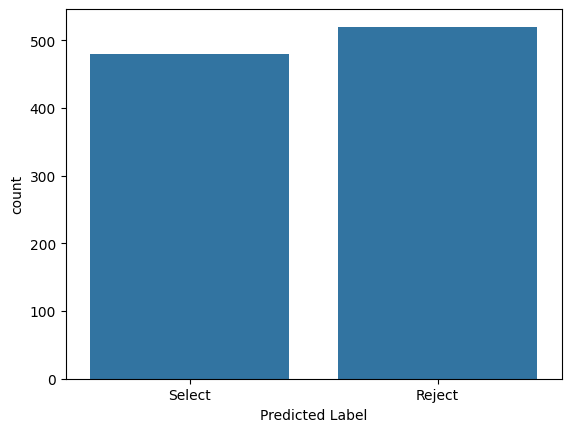

In [99]:
sns.countplot(x="Predicted Label" ,data=df)

<Axes: xlabel='Type of Product', ylabel='count'>

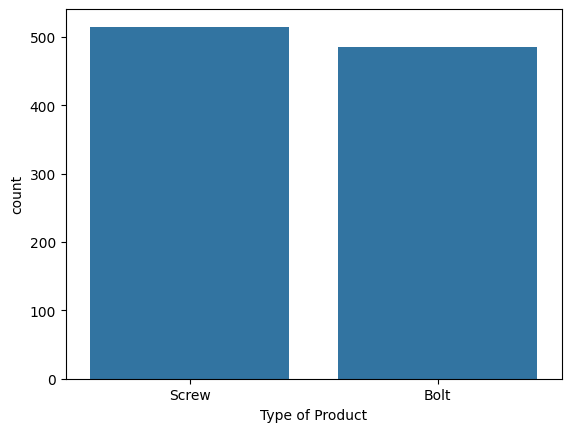

In [100]:
sns.countplot(x="Type of Product" ,data=df)

Train Accuracy: 94.38 %
Test Accuracy: 49.5 %

Test Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.59      0.55       105
           1       0.46      0.39      0.42        95

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200



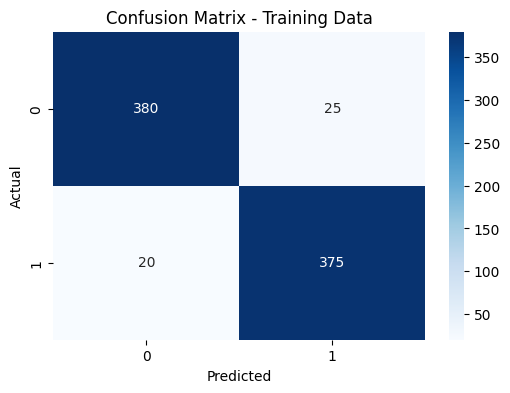

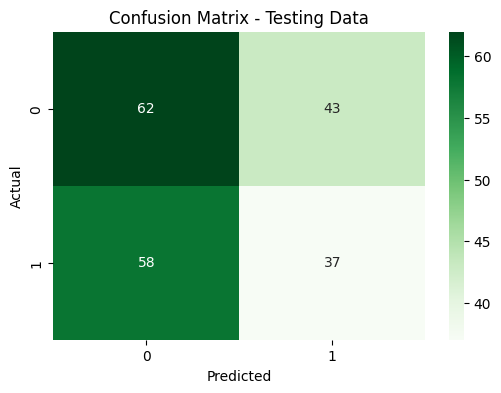

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X = df[['Overall Length (mm)', 'Thread Length (mm)', 'Flat (mm)']]
y = df['Label']
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print("Train Accuracy:", round(accuracy_score(y_train, y_train_pred) * 100, 2), "%")
print("Test Accuracy:", round(accuracy_score(y_test, y_test_pred) * 100, 2), "%")
print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

#Confusion Matrix (Train)
train_cm = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Training Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Confusion Matrix (Test)
test_cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Testing Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [102]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv('screw_bold.csv')
X = df.drop('Label', axis=1)  # Replace 'Label' with actual target column name if different
y = df['Label']
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
if y.dtype == 'object':
    le_y = LabelEncoder()
    y = le_y.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Test Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        95

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix:
 [[105   0]
 [  0  95]]


/home/inr/jupyter_env/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:38:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
